<img src="./logo_UNSAM.jpg" align="right" width="150" />  -->

#### Análisis y procesamiento de señales

# Trabajo Práctico Nº2
#### Santiago Manuel Corral


# Introducción 

En esta segunda entrega se analizo la respuesta en frecuencia de Filtros Pasivos RLC. Se halló la función transferencia (H(s)), se buscó la respuesta de modulo y fase, y se analizo el tipo de filtro, y el ancho de banda del mismo.
Los filtros en cuestión eran los siguientes:



<img src="./Filtros.png"/>

# 1) Hallar analiticamente la función transferencia (H(s))

La función transferencia:

\begin{equation}
H(S) = \frac {V_o(S)}{V_i(S)}
\end{equation}

Esta relación directa entre la entrada y la salida del sistema nos permite analizar el comportamiento, estabilidad y la respuesta en frecuencia de un sistema.

### Filtro a)

Se tienen las siguientes impedancias: 
\begin{equation}
Z_C = \frac{1}{sC}, \quad Z_L = sL, \quad Z_R = R
\end{equation}

La salida $V_o $  se obtiene como:

$$ V_o = Z_{R} = R$$

La entrada $V_i$  es:

$$ V_i = Z_C + Z_L + Z_R = \frac{1}{sC} + sL + R $$

Por lo tanto, la función de transferencia es:

$$ H(s) = \frac{V_o}{V_i} = \frac{R}{\frac{1}{sC} + sL + R}$$

Multiplicando por \( sC \) para simplificar:

$$ H(s) = \frac{RCs}{s^2 C L + RCs + 1} $$

Factorizando:

$$ H(s) = \frac{Rs}{L} \frac{1}{s^2 + \frac{R}{L} s + \frac{1}{CL}} $$

**Frecuencia natural y factor de calidad**

La frecuencia natural del sistema está dada por:

$$ \omega_0 = \frac{1}{\sqrt{L C}} $$

El factor de calidad se define como:

$$ Q = \frac{\sqrt{L C}L}{R} $$

El ancho de banda del filtro se calcula:

$$ BW = \frac{\omega_0}{Q} = R/L $$

### Filtro b)

Teniendo las mismas impedancias para C, L y R:

La salida $V_o $  se obtiene como:

$$ V_o = Z_{L R} = \frac{Z_L \cdot Z_R}{Z_L + Z_R} = \frac{sL R}{sL + R} $$

La entrada $V_i$  es:

$$ V_i = Z_C + Z_{L R} = \frac{1}{sC} + \frac{sL R}{sL + R} $$

Por lo tanto, la función de transferencia es:

$$ H(s) = \frac{V_o}{V_i} = \frac{\frac{sL R}{sL + R}}{\frac{1}{sC} + \frac{sL R}{sL + R}} $$

Multiplicando por \( sC(sL + R) \) para simplificar:

$$ H(s) = \frac{s^2 C L R}{sL + R + s^2 C L R} $$

Factorizando:

$$ H(s) = \frac{s^2}{s^2 + \frac{s}{RC} + \frac{1}{CL}} $$

**Frecuencia natural y factor de calidad**

La frecuencia natural del sistema está dada por:

$$ \omega_0 = \frac{1}{\sqrt{L C}} $$

El factor de calidad se define como:

$$ Q = \frac{\sqrt{L C}}{R C} $$

El ancho de banda del filtro se calcula:

$$ BW = \frac{\omega_0}{Q} = RC $$

# Calculo y grafico de la respuesta de módulo y fase

Se tomaron valores normalizados para RLC, esto permite fijar la frecuencia $\omega_0 = 1$. Lo que poermite analizar el sistema con el uso dela funcion sig.bode() de la librería scipy. Esta función genera un vector con los respectivos valores de frecuencia y fase para un espectro de frecuencias definido.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Parámetros del circuito 
R = 1  # Resistencia en ohmios
L = 1  # Inductancia en Henrios
C = 1  # Capacitancia en Faradios

### Filtro a)

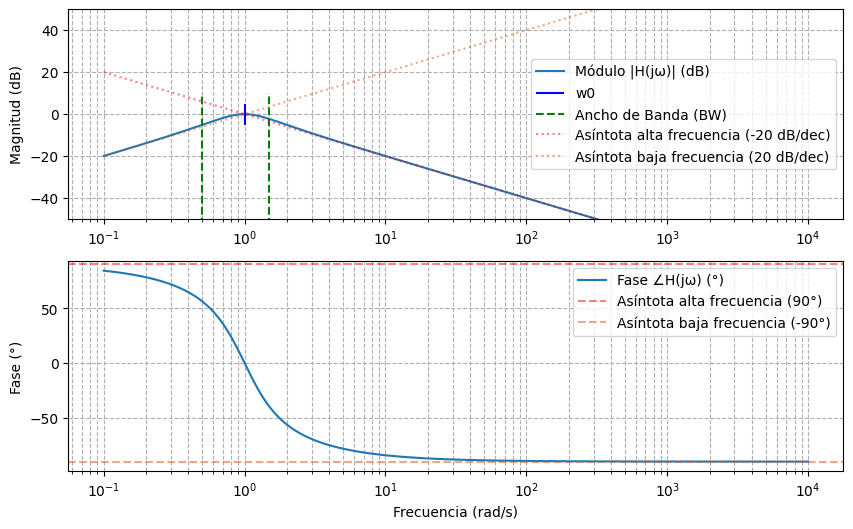

In [30]:
#%% Funcion 1

# Definir la función de transferencia H(s) = (R sC) / (1 + R sC + s^2 LC)
num = [R, 0]  # Numerador: R * s
den = [L, R, 1/C]  # Denominador: L * s^2 + R * s + 1/C
w0 = 1/np.sqrt(L*C) 

w0 = 1/np.sqrt(L*C)
Q = (np.sqrt(L*C)*L)/R
BW=w0/Q
# Crear el sistema en función de s
system = sig.TransferFunction(num, den)

# Definir el rango de frecuencias para el análisis
w = np.logspace(-1, 4, 1000) # Frecuencia de 10^-1 a 10^5 rad/s #!! De cambiar los valores de RLC hay que prestar atencion al rango de frecuencias
# Obtener la respuesta en frecuencia
w, mag, phase = sig.bode(system, w)

# EQ. asintota de altas frecuencia
asintota_alta = -20 * np.log10(w) + 20 * np.log10(R / L)
fase_asintota_alta = 90   # Fase en alta frecuencia

# EQ. asintota bajas frecuencia 
asintota_baja = 20 * np.log10(w) 
fase_asintota_baja = -90  # Fase en baja frecuencia

# Graficar la respuesta en magnitud
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag, label="Módulo |H(jω)| (dB)")
#w0
## Señalar el valor específico w0 en el eje x con una marca
##plt.scatter([w0], [np.interp(w0, w, mag)], color='r', zorder=5)  # Marca el punto en (x=w0, y=mag(w0))

# Añadir una pequeña línea vertical en w0 (acortar la longitud de la línea)
plt.vlines(w0, ymin=np.interp(w0, w, mag) - 5, ymax=np.interp(w0, w, mag) + 5, color='b', linestyle='-', label='w0')

#Ancho de banda
plt.vlines([w0 - BW/2, w0 + BW/2], ymin=np.min(mag)-10, ymax=np.max(mag)+10, color='g', linestyle='--', label="Ancho de Banda (BW)")

plt.plot(w, asintota_alta, color='r', linestyle='dotted', alpha = 0.5, label="Asíntota alta frecuencia (-20 dB/dec)")
plt.plot(w, asintota_baja, color=(0.8500, 0.3250, 0.0980), linestyle='dotted', alpha = 0.5, label="Asíntota baja frecuencia (20 dB/dec)")
plt.ylabel("Magnitud (dB)")
plt.ylim(-50,50)
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Graficar la respuesta en fase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase, label="Fase ∠H(jω) (°)")
plt.axhline(fase_asintota_alta, color='r', linestyle='--', alpha = 0.5, label="Asíntota alta frecuencia (90°)")
plt.axhline(fase_asintota_baja, color=(0.8500, 0.3250, 0.0980), linestyle='--', alpha = 0.5, label="Asíntota baja frecuencia (-90°)")
plt.ylabel("Fase (°)")
plt.xlabel("Frecuencia (rad/s)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

plt.show()

Podemos ver que este filtro se trata de un filtro pasa-banda. En el análisis de modulo vemos como para bajas frecuencias $ 
(\omega \rightarrow 0) $ el modulo crece con una pendiente de 20 dB/decada, luego para altas frecuencias $ (\omega \rightarrow \infty) $ el modulo decrece con una pendiente de -20 dB/decada. Por ultimo cuando la frecuencia se acerca a $ \omega_0 $ $ (\omega_0 \rightarrow \infty) $ (frecuencia de resonancia) el modulo se acerca a 1. Este es un evidente comportamiento de un filtro pasa-banda. 

### Filtro b)

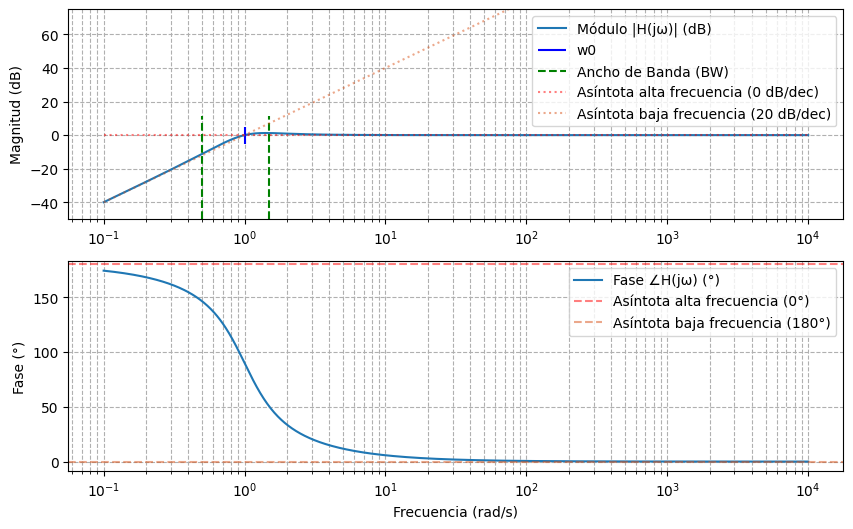

In [31]:
#%% Funcion 2

# Definir la función de transferencia H(s) = (R sC) / (1 + R sC + s^2 LC)
num = [1, 0, 0]  # Numerador: s**2
den = [1, 1/(R*C), 1/(L*C)]  # Denominador: s^2 + s / R*C + 1/L*C

w0 = 1/np.sqrt(L*C)
Q = (np.sqrt(L*C))/R*C
BW=w0/Q

# Crear el sistema en función de s
system = sig.TransferFunction(num, den)

# Definir el rango de frecuencias para el análisis
w = np.logspace(-1, 4, 1000)  # Frecuencia de 10^-1 a 10^5 rad/s

# Obtener la respuesta en frecuencia
w, mag, phase = sig.bode(system, w)

# EQ. asintota de altas frecuencia
asintota_alta = 20 * np.log10(R / L) * w
fase_asintota_alta = 180   # Fase en alta frecuencia

# EQ. asintota bajas frecuencia 
asintota_baja = 40 * np.log10(1 / (R * C) * w) 
fase_asintota_baja = 0  # Fase en baja frecuencia

# Graficar la respuesta en magnitud
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag, label="Módulo |H(jω)| (dB)")
#w0
## Señalar el valor específico w0 en el eje x con una marca
##plt.scatter([w0], [np.interp(w0, w, mag)], color='r', zorder=5)  # Marca el punto en (x=w0, y=mag(w0))

# Añadir una pequeña línea vertical en w0 (acortar la longitud de la línea)
plt.vlines(w0, ymin=np.interp(w0, w, mag) - 5, ymax=np.interp(w0, w, mag) + 5, color='b', linestyle='-', label='w0')

#Ancho de banda
plt.vlines([w0 - BW/2, w0 + BW/2], ymin=np.min(mag)-10, ymax=np.max(mag)+10, color='g', linestyle='--', label="Ancho de Banda (BW)")
plt.plot(w, asintota_alta, color='r', linestyle='dotted', alpha = 0.5, label="Asíntota alta frecuencia (0 dB/dec)")
plt.plot(w, asintota_baja, color=(0.8500, 0.3250, 0.0980), linestyle='dotted', alpha = 0.5, label="Asíntota baja frecuencia (20 dB/dec)")
plt.ylabel("Magnitud (dB)")
plt.ylim(-50,75)
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Graficar la respuesta en fase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase, label="Fase ∠H(jω) (°)")
plt.axhline(fase_asintota_alta, color='r', linestyle='--', alpha = 0.5, label="Asíntota alta frecuencia (0°)")
plt.axhline(fase_asintota_baja, color=(0.8500, 0.3250, 0.0980), linestyle='--', alpha = 0.5, label="Asíntota baja frecuencia (180°)")
plt.ylabel("Fase (°)")
plt.xlabel("Frecuencia (rad/s)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

plt.show()

# # %%Simulacion sinusoidal

# tt, xx = mi_funcion_sen(1, 0, 100, 0, 1000, 1000)

# # Simu

Repitiendo el análisis anterior, en este caso se trata de un filtro pasa-altos. Ahora en el análisis de modulo vemos como para bajas frecuencias $ 
(\omega \rightarrow 0) $ el modulo crece con una pendiente de 40 dB/década. Cuando la frecuencia se acerca a $ \omega_0 $ $ (\omega_0 \rightarrow \infty) $ (frecuencia de resonancia) el modulo se acerca a 1, manteniéndose para las altas frecuencias $ (\omega \rightarrow \infty) $. Este es un evidente comportamiento de un filtro pasa-altos.

**Bonus:** Al encadenar ambos filtros en cascada, la funcion transferencia resultante seria la multiplicación de $ H_1(t) * H_2(t)$
$$ H(t) = \frac{s^2}{s^2 + \frac{s}{RC} + \frac{1}{CL}} *  \frac{Rs}{L} \frac{1}{s^2 + \frac{R}{L} s + \frac{1}{CL}}$$ Por lo que tendriamos un filtro de cuarto orden

Aclaración: Se utilizo ChatGPT para facilitar el armado de los plots en el python, de todas maneras se verifico que estos tengan correlación con los graficos buscados a mano. Se deja todo el desarrollo manuscrito a continuación:

In [16]:
from IPython.display import display, IFrame

# Provide the path to your PDF (use raw string or double backslashes)
pdf_path = r"C:\Users\santi\Desktop\Facu\APS\Trabajos\TS 2_Manuscrito.pdf"

# Display the PDF
display(IFrame(pdf_path, width=800, height=600))
